<a href="https://colab.research.google.com/github/walson6/Implementation-and-Visualization-of-K-Nearest-Neighbor-Algorithm/blob/main/Jim_GitHub_Implementation_and_Visualization_of_KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Title: Implementation and Visualization of K Nearest Neighbor Algorithm

**Objective:**  
To understand the implementation of the K Nearest Neighbor (KNN) algorithm and learn the basics of the scikit-learn (sklearn) library.

**Implementation:**  
- Created training and testing datasets with 40 and 500 points respectively using NumPy.
- Implemented the L2 distance function to calculate the Euclidean distance between data samples.
- Developed the `knn_classifier_predict` function to predict labels for test points by finding the k nearest neighbors and selecting the most common label.
- Implemented the `knn_regressor_predict` function to predict values for test points based on the mean of the k nearest neighbors' labels.

**Visualization:**  
- Utilized Matplotlib to plot the training data and the predicted values, providing a clear visual representation of the KNN regression results.

**Skills Demonstrated:**  
- Proficiency in Python programming.
- Understanding of machine learning concepts, specifically the KNN algorithm.
- Experience with data manipulation and analysis using NumPy.
- Knowledge of data visualization techniques using Matplotlib.
- Familiarity with the scikit-learn library.

**Tools and Libraries Used:**  
- Python
- NumPy
- Matplotlib
- scikit-learn (sklearn)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Initialize random seed
rng = np.random.RandomState(0)
# Create Training and testing data, 40 and 500 points respectively
X_train = np.sort(5 * rng.rand(40, 1), axis=0)
X_test = np.linspace(0, 5, 500)[:, np.newaxis]
y_train = np.sin(X_train).ravel()
# Add noise to targets
y_train[::5] += 1 * (0.5 - np.random.rand(8))
y_test = np.sin(X_test).ravel()

In [3]:
# Implemetation of L2_distance(s1, s2) function
# With s1 and s2 being data samples from the training set, the function finds the Euclidean distance, a straight-line distance between two points. It returns the distance as a scalar.
def L2_distance(s1, s2):
  # Squaring ensures that all values are non-negative, which is then square rooted to find the actual Euclidean distance value
  return np.sqrt(np.sum((np.array(s1) - np.array(s2))**2))

In [4]:
# Implementation of knn_classifier_predict(training_data, training_labels, test_point, k)
# Given a dataset with labeled training samples, this function predicts the label of a test_point by finding the k nearest neighbors from the training set
def knn_classifier_predict(training_data, training_labels, test_point, k):
  distances = [] # Initialize an empty list
  for i in range(len(training_data)):
    dist = L2_distance(training_data[i], test_point) # Call L2_distance function to find Euclidean distance from each training dataset point to the test point
    distances.append((dist, training_labels[i])) # Appends to distance list in pairs of distance and corresponding label

  # Sorts distances list by ascending order according to the first element (distance) of each tuple
  distances.sort(key=lambda x: x[0])

  # Get the labels of the k nearest neighbors
  k_nearest_labels = []
  for i in range(k):
    k_nearest_labels.append(distances[i][1])

  # Count how many times each label occurs
  label_counts = {}
  for label in k_nearest_labels:
    if label in label_counts:
      label_counts[label] += 1
    else:
      label_counts[label] = 1

  # Find the label with the highest count
  max_count = 0;
  most_common_labels = []
  for label in label_counts:
    if label_counts[label] > max_count:
      max_count = label_counts[label]
      most_common_labels = [label]
    elif label_counts[label] == max_count:
      most_common_labels.append(label)

  # If no tie, return most common label
  if len(most_common_labels) == 1:
    return most_common_labels[0]

  # If tie, check within closest neighbors and return label of closest tied neighbor
  for i in range(k):
    if distances[i][1] in most_common_labels:
      return distances[i][1]

In [5]:
# Implementation of knn_regressor_predict(training_data, training_labels, test_point, k)
# This function predicts a value for test_point based on k nearest neighbors from training_data
def knn_regressor_predict(training_data, training_labels, test_point, k):
  distances = []  # Store distances to each training point

  # Finds the Euclidean distance between each training data point and the given test point. It then stores these distances along with the corresponding training labels in a list.
  for i in range(len(training_data)):
    dist = L2_distance(training_data[i], test_point)
    distances.append((dist, training_labels[i]))

  # Sort by distance in ascending order
  distances.sort(key=lambda x: x[0])

  # Get k nearest neighbors' labels
  k_nearest_labels = [label for _, label in distances[:k]]

  # Return the mean value as prediction
  return np.mean(k_nearest_labels)

In [6]:
y_pred = []
for i in range(len(X_test)):
  y_pred.append(knn_regressor_predict(X_train, y_train, X_test[i], 5))

In [7]:
def knn_plot_results(X_train, y_train, X_test, y_pred):
  plt.scatter(X_train, y_train, color="darkorange", label="data")
  plt.plot(X_test, y_pred, color="navy", label="prediction")
  plt.axis("tight")
  plt.legend()
  plt.title("KNeighborsRegressor")
  plt.tight_layout()
  plt.show()

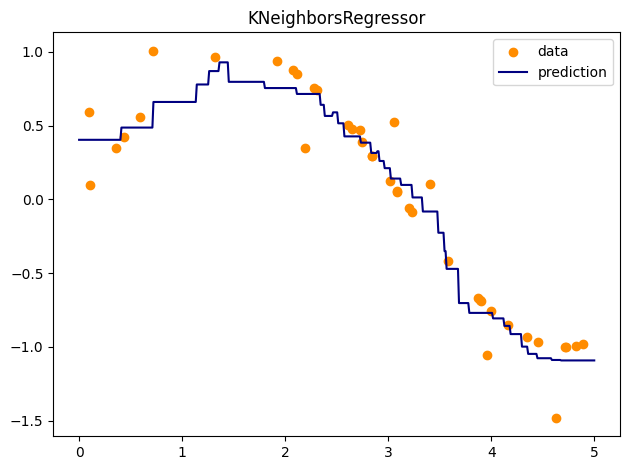

In [8]:
# Plot
knn_plot_results(X_train, y_train, X_test, y_pred)